<a href="https://colab.research.google.com/github/FranciscoGallegosSilva/Deep-Learning-with-Python/blob/main/Deep_learning_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Chapter 2:** *The mathematical building blocks of
neural networks*

2.1 A first look at a neural network

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [2]:
# 2.1.1 Loading the MNIST dataset in Keras (handwritten digits)
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [7]:
# Train & Test shape
print(train_images.shape, test_images.shape)
print(len(train_labels), len(test_labels))
print(np.unique(train_labels), np.unique(test_labels))

(60000, 28, 28) (10000, 28, 28)
60000 10000
[0 1 2 3 4 5 6 7 8 9] [0 1 2 3 4 5 6 7 8 9]


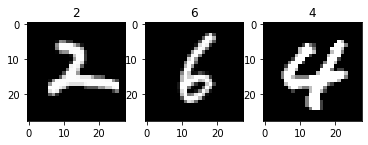

In [33]:
import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)

# show each image, and make each title the label
# these are grayscale images so use appropriate heatmap
ax1.imshow(train_images[4701], cmap=plt.get_cmap('gray'))
ax1.set_title(str(train_labels[4701]))
ax2.imshow(train_images[4702], cmap=plt.get_cmap('gray'))
ax2.set_title(str(train_labels[4702]))
ax3.imshow(train_images[4703], cmap=plt.get_cmap('gray'))
ax3.set_title(str(train_labels[4703]))

fig.show()

In [8]:
# 2.1.2 The network architecture
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
layers.Dense(512, activation="relu"),
layers.Dense(10, activation="softmax")
])

In [9]:
# 2.1.3 The compilation step
model.compile(optimizer="rmsprop",
loss="sparse_categorical_crossentropy",
metrics=["accuracy"])

In [10]:
#2.1.4 Preparing the image data
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [11]:
#2.1.5 "Fitting" the model
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.2518 - accuracy: 0.9273
Epoch 2/5
469/469 [==============================] - 4s 10ms/step - loss: 0.1030 - accuracy: 0.9693
Epoch 3/5
469/469 [==============================] - 4s 10ms/step - loss: 0.0680 - accuracy: 0.9792
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0495 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 4s 10ms/step - loss: 0.0375 - accuracy: 0.9888


In [12]:
#2.1.6 Using the model to make predictions
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0] #Each number of index in that array corresponds to the probability i that digit imagetest_digits[0] belong to class i.

array([4.1526438e-10, 1.3223322e-10, 1.3872458e-06, 2.9845824e-05,
       8.1904714e-13, 9.1709706e-09, 3.6591959e-15, 9.9996793e-01,
       1.6748153e-07, 6.9859487e-07], dtype=float32)

In [18]:
print(predictions[0].argmax()) #Highest probability score position
print(predictions[0][7]) #Probability score of number 7
print(test_labels[7]) #Check label in 7th position

7
0.99996793
9


In [23]:
# 2.1.7 Evaluating the model on new data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {round(test_acc,4)}") 

313/313 [==============================] - 1s 2ms/step - loss: 0.0665 - accuracy: 0.9795
test_acc: 0.9795


2.2 Data representations for neural networks

Data stored in multidimensinoal NumPy arrays are called tensors. Tensor is a container for data (usually numerical data). Tensors are a generalization of matrices to an arbitrary number of dimensions -*axis*

In [24]:
#2.2.1 Scarlars (rank-0 tensors)
x = np.array(12)
x.ndim

0

In [25]:
#2.2.2 Vectors (rank-1 tensors)
x = np.array([12, 3, 6, 14, 7]) #5-dimensional vector
x.ndim

1

In [27]:
#2.2.3 Matrices (rank-2 tensors)
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

In [28]:
#2.2.4 Rank-3 tensors and higher-rank tensors
x = np.array ([[[5, 78, 2, 34, 0],
                [6, 79, 3, 35, 1],
                [7, 80, 4, 36, 2]],
               [[5, 78, 2, 34, 0],
                [6, 79, 3, 35, 1],
                [7, 80, 4, 36, 2]],
               [[5, 78, 2, 34, 0],   
                [6, 79, 3, 35, 1],
                [7, 80, 4, 36, 2]]])
x.ndim

3

By packing rank-3 tensors in an array, you can create a rank-4 tensor, and so on. In deep
learning, you’ll generally manipulate tensors with ranks 0 to 4, although you may go up to 5 if
you process video data.

2.2.5 Key attributes

A tensor is defined by three key attributes:

*   Number of axes (rank)—For instance, a rank-3 tensor has three axes, and a matrix has two axes. This is also called the tensor’s ndim in Python libraries such as NumPy or TensorFlow.
*   Shape—This is a tuple of integers that describes how many dimensions the tensor has along each axis. For instance, the previous matrix example has shape (3, 5), and the rank-3 tensor example has shape (3, 3, 5). A vector has a shape with a single element, such as (5,), whereas a scalar has an empty shape, ().
*   Data type (usually called dtype in Python libraries)—This is the type of the data contained in the tensor; for instance, a tensor’s type could be float16, float32, float64, uint8, and so on. In TensorFlow, you are also likely to come across string tensors.



In [30]:
#Example
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [34]:
train_images.ndim

3

In [35]:
train_images.dtype

dtype('uint8')

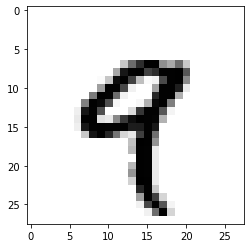

The corresponding label is: 9


In [41]:
digit = train_images[4]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
print("The corresponding label is:",train_labels[4])